**ERRORE MEDIO DISTANZA EUCLIDEA**

In [1]:
import numpy as np

def calculate_mean_error(estimated_positions, true_positions):
    """Calcola l'errore medio euclideo tra le posizioni stimate e quelle reali."""
    errors = []
    for est_pos, true_pos in zip(estimated_positions, true_positions):
        error = np.sqrt((est_pos[0] - true_pos[0]) ** 2 + (est_pos[1] - true_pos[1]) ** 2)
        errors.append(error)
    return np.mean(errors)

# Coordinate previste (KNN, SVR, RF per posizione 126, 531 e 278)
estimated_positions = [
    [(0.82, 1.28), (0.54, 1.56), (-0.04, 1.82)],  # Posizione 126
    [(1.59, 1.98), (1.72, 2.43), (2.01, 1.69)],  # Posizione 531
    [(0.81, 2.40), (0.60, 2.51), (0.88, 2.48)]   # Posizione 278
]

# Coordinate reali per ciascuna posizione
true_positions = [
    (0.0, 1.33),  # Posizione 126
    (2.0, 1.83),  # Posizione 531
    (0.7, 2.53)   # Posizione 278
]

# Calcolo dell'errore euclideo medio per ogni posizione
mean_errors = []
for i, est_pos in enumerate(estimated_positions):
    mean_error = calculate_mean_error(est_pos, [true_positions[i]] * len(est_pos))
    mean_errors.append(mean_error)

mean_errors

[0.6333647139020255, 0.41301736727497246, 0.1530298902846046]

**R2 e MSE**

In [2]:
import numpy as np

# Dati delle coordinate reali e previste
data = {
    'KNN': [
        (0.82, 1.28, 0.0, 1.33),  # Posizione 126
        (1.59, 1.98, 2.0, 1.83),  # Posizione 531
        (0.81, 2.40, 0.7, 2.53)   # Posizione 278
    ],
    'SVR': [
        (0.54, 1.56, 0.0, 1.33),  # Posizione 126
        (1.72, 2.43, 2.0, 1.83),  # Posizione 531
        (0.60, 2.51, 0.7, 2.53)   # Posizione 278
    ],
    'RF': [
        (-0.04, 1.82, 0.0, 1.33), # Posizione 126
        (2.01, 1.69, 2.0, 1.83),  # Posizione 531
        (0.88, 2.48, 0.7, 2.53)   # Posizione 278
    ]
}

def calculate_euclidean_error(predictions):
    """Calcola l'errore euclideo medio per un dato modello."""
    errors = []
    for x_pred, y_pred, x_true, y_true in predictions:
        error = np.sqrt((x_pred - x_true) ** 2 + (y_pred - y_true) ** 2)
        errors.append(error)
    return np.mean(errors)

# Calcolo dell'errore euclideo medio per ogni modello
results = {model: calculate_euclidean_error(predictions) for model, predictions in data.items()}

# Stampa dei risultati
for model, error in results.items():
    print(f"Errore Euclideo medio per {model}: {error:.4f}")


Errore Euclideo medio per KNN: 0.4761
Errore Euclideo medio per SVR: 0.4503
Errore Euclideo medio per RF: 0.2729


In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Coordinate reali per X e Y
y_true_x = [0, 2, 0.7]  # Coordinate reali x (per posizioni 126, 531, 278)
y_true_y = [1.33, 1.83, 2.53]  # Coordinate reali y (per posizioni 126, 531, 278)

# Coordinate previste per X e Y ottenute con i diversi modelli
pred_knn_x = [0.82, 1.59, 0.81]
pred_svr_x = [0.54, 1.72, 0.60]
pred_rf_x = [-0.04, 2.01, 0.88]

pred_knn_y = [1.28, 1.98, 2.40]
pred_svr_y = [1.56, 2.43, 2.51]
pred_rf_y = [1.82, 1.69, 2.48]

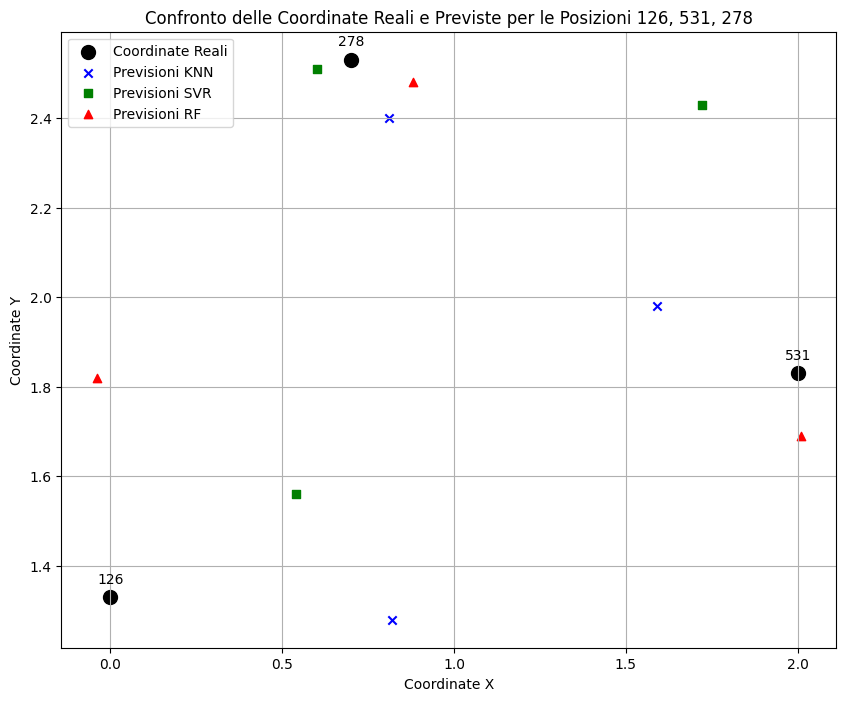

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#Test effettuato facendo riferimento alle posizioni definite nel dataset
# Coordinate reali e previste (estratte dalla tabella)
positions = ['126', '531', '278']
x_real = [0, 2, 0.7]
y_real = [1.33, 1.83, 2.53]

x_knn = [0.82, 1.59, 0.81]
y_knn = [1.28, 1.98, 2.40]

x_svr = [0.54, 1.72, 0.60]
y_svr = [1.56, 2.43, 2.51]

x_rf = [-0.04, 2.01, 0.88]
y_rf = [1.82, 1.69, 2.48]

# Impostiamo il grafico
plt.figure(figsize=(10, 8))

# Scatter plot per le coordinate reali
plt.scatter(x_real, y_real, color='black', label='Coordinate Reali', marker='o', s=100)

# Scatter plot per le coordinate KNN
plt.scatter(x_knn, y_knn, color='blue', label='Previsioni KNN', marker='x')

# Scatter plot per le coordinate SVR
plt.scatter(x_svr, y_svr, color='green', label='Previsioni SVR', marker='s')

# Scatter plot per le coordinate RF
plt.scatter(x_rf, y_rf, color='red', label='Previsioni RF', marker='^')

# Aggiungiamo etichette alle posizioni
for i, txt in enumerate(positions):
    plt.annotate(txt, (x_real[i], y_real[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10)

# Linea ideale (y=x)
#plt.plot([0, 2.5], [0, 2.5], color='gray', linestyle='--', label='Linea Ideale (y=x)')

# Aggiungiamo titolo e legende
plt.title('Confronto delle Coordinate Reali e Previste per le Posizioni 126, 531, 278')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()


**VALUTIAMO**

In [6]:
import numpy as np

def calculate_mean_error( estimated_positions, true_positions):
    """Calculate the mean distance error between estimated and true positions."""
    errors = []
    for est_pos, true_pos in zip(estimated_positions, true_positions):
        error = np.sqrt((est_pos[0] - true_pos[0]) ** 2 + (est_pos[1] - true_pos[1]) ** 2)
        errors.append(error)
    return np.mean(errors)


# **VALUTAZIONE MODELLI TRAINING E TEST SET**


**SENZA OTTIMIZZAZIONE**

In [ ]:
# Importa le librerie necessarie
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Carica il dataset
# Assicurati di caricare il file CSV nel tuo ambiente Colab. Puoi utilizzare l'interfaccia di Colab per farlo.
file_path = '/content/Dataset_Beacon_iTag.csv'  # Sostituisci con il percorso reale del file
data = pd.read_csv(file_path)

# Estrazione delle features (RSSI) e delle coordinate (x, y)
features = data.iloc[:, 3:].values  # Considera solo le colonne RSSI
x_values = data['x'].values  # coordinata x
y_values = data['y'].values  # coordinata y
# 2. Applicare lo scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Unisci le coordinate in un array bidimensionale per rappresentare le coordinate target
y = np.vstack((x_values, y_values)).T

#print(f"y{y}")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Separazione delle coordinate x e y come target separati
y_x = data['x'].values  # Coordinata x
y_y = data['y'].values  # Coordinata y

# Suddivisione del dataset in training e test set per X e per le coordinate x e y
X_train, X_test, y_train_x, y_test_x = train_test_split(X_scaled, y_x, test_size=0.1, random_state=42)
_, _, y_train_y, y_test_y = train_test_split(X_scaled, y_y, test_size=0.2, random_state=42)

# Definizione dei modelli per x e y
models = {
    'KNN': (KNeighborsRegressor(), KNeighborsRegressor()),
    'SVR': (SVR(), SVR()),
    'RandomForest': (RandomForestRegressor(), RandomForestRegressor())
}

# Dizionario per memorizzare i risultati
results = {}

# Itera sui modelli
for name, (model_x, model_y) in models.items():

    # Addestra il modello per x
    model_x.fit(X_train, y_train_x)
    predictions_x = model_x.predict(X_test)

    # Addestra il modello per y
    model_y.fit(X_train, y_train_y)
    predictions_y = model_y.predict(X_test)

    # Calcola le metriche per x
    mse_x = mean_squared_error(y_test_x, predictions_x)
    rmse_x = np.sqrt(mse_x)
    mae_x = mean_absolute_error(y_test_x, predictions_x)
    r2_x = r2_score(y_test_x, predictions_x)

    # Calcola le metriche per y
    mse_y = mean_squared_error(y_test_y, predictions_y)
    rmse_y = np.sqrt(mse_y)
    mae_y = mean_absolute_error(y_test_y, predictions_y)
    r2_y = r2_score(y_test_y, predictions_y)

    # Media delle metriche tra x e y
    mse_avg = (mse_x + mse_y) / 2
    rmse_avg = (rmse_x + rmse_y) / 2
    mae_avg = (mae_x + mae_y) / 2
    r2_avg = (r2_x + r2_y) / 2

    # Salva i risultati
    results[name] = {
        'MSE_x': mse_x, 'RMSE_x': rmse_x, 'MAE_x': mae_x, 'R²_x': r2_x,
        'MSE_y': mse_y, 'RMSE_y': rmse_y, 'MAE_y': mae_y, 'R²_y': r2_y,
        'MSE_avg': mse_avg, 'RMSE_avg': rmse_avg, 'MAE_avg': mae_avg, 'R²_avg': r2_avg
    }

# Stampa i risultati
for name, metrics in results.items():
    print(f"{name}:\n"
          f"  X - MSE={metrics['MSE_x']:.2f}, RMSE={metrics['RMSE_x']:.2f}, MAE={metrics['MAE_x']:.2f}, R²={metrics['R²_x']:.2f}\n"
          f"  Y - MSE={metrics['MSE_y']:.2f}, RMSE={metrics['RMSE_y']:.2f}, MAE={metrics['MAE_y']:.2f}, R²={metrics['R²_y']:.2f}\n"
          f"  Media - MSE={metrics['MSE_avg']:.2f}, RMSE={metrics['RMSE_avg']:.2f}, MAE={metrics['MAE_avg']:.2f}, R²={metrics['R²_avg']:.2f}\n")


KNN:
  X - MSE=0.47, RMSE=0.68, MAE=0.53, R²=0.41
  Y - MSE=0.19, RMSE=0.43, MAE=0.33, R²=0.47
  Media - MSE=0.33, RMSE=0.56, MAE=0.43, R²=0.44

SVR:
  X - MSE=0.33, RMSE=0.58, MAE=0.42, R²=0.58
  Y - MSE=0.17, RMSE=0.42, MAE=0.32, R²=0.51
  Media - MSE=0.25, RMSE=0.50, MAE=0.37, R²=0.54

RandomForest:
  X - MSE=0.45, RMSE=0.67, MAE=0.50, R²=0.43
  Y - MSE=0.21, RMSE=0.46, MAE=0.36, R²=0.40
  Media - MSE=0.33, RMSE=0.56, MAE=0.43, R²=0.42



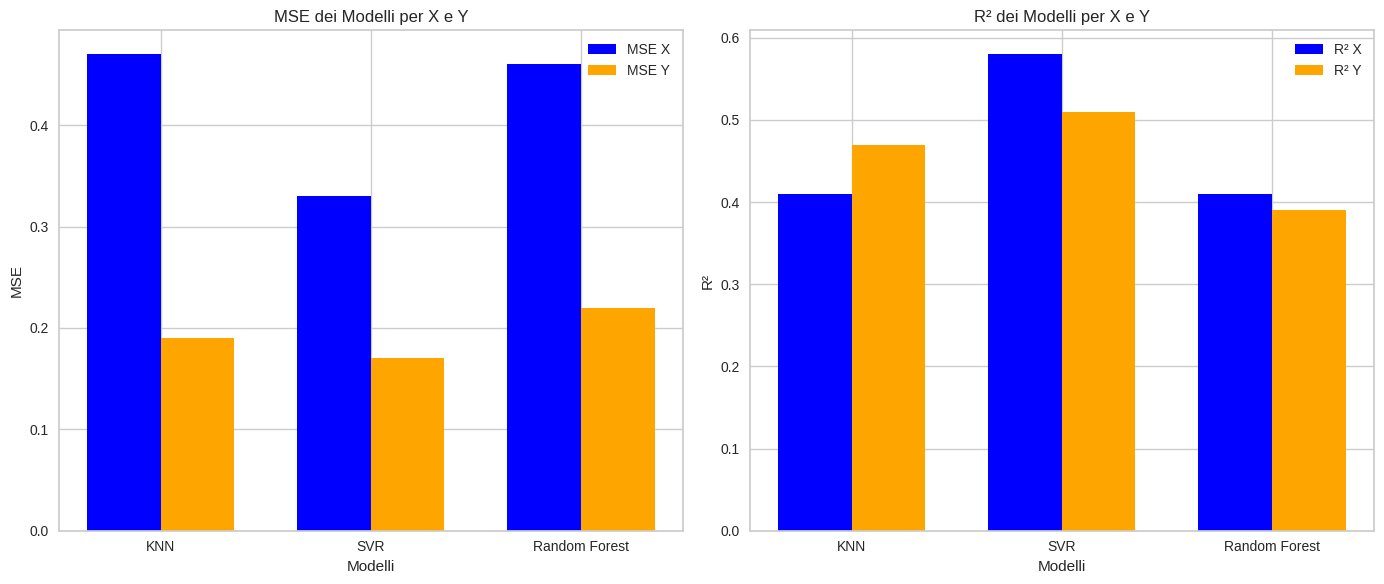

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dati per MSE
models = ['KNN', 'SVR', 'Random Forest']
mse_x = [0.47, 0.33, 0.46]  # MSE per la coordinata X
mse_y = [0.19, 0.17, 0.22]  # MSE per la coordinata Y

# Dati per R²
r2_x = [0.41, 0.58, 0.41]  # R² per la coordinata X
r2_y = [0.47, 0.51, 0.39]  # R² per la coordinata Y

# Grafico MSE e R²
plt.figure(figsize=(14, 6))

# Sottogruppo 1: MSE
plt.subplot(1, 2, 1)
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, mse_x, width=bar_width, label='MSE X', color='blue')
plt.bar(x + bar_width/2, mse_y, width=bar_width, label='MSE Y', color='orange')

plt.xlabel('Modelli')
plt.ylabel('MSE')
plt.title('MSE dei Modelli per X e Y')
plt.xticks(x, models)
plt.legend()

# Sottogruppo 2: R²
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, r2_x, width=bar_width, label='R² X', color='blue')
plt.bar(x + bar_width/2, r2_y, width=bar_width, label='R² Y', color='orange')

plt.xlabel('Modelli')
plt.ylabel('R²')
plt.title('R² dei Modelli per X e Y')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()


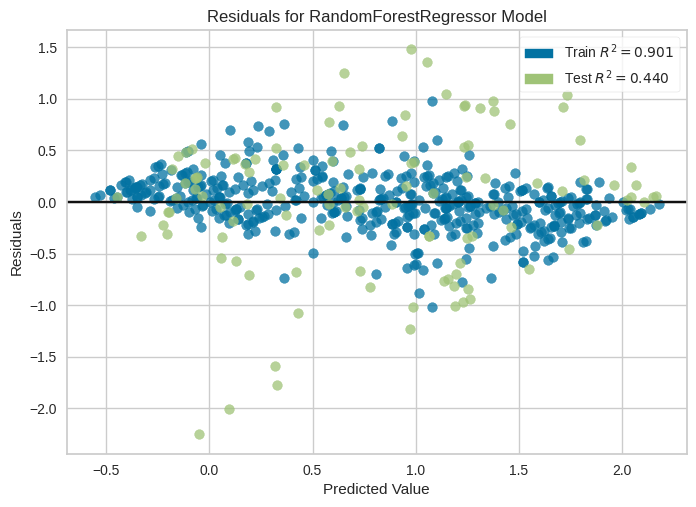

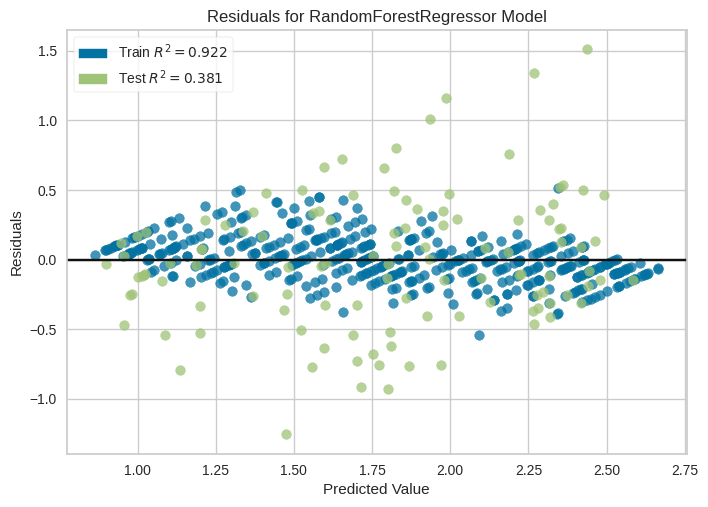

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming X_scaled, y_x, y_y are already defined as in your previous code

# Split data for x and y separately
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(
    X_scaled, y_x, test_size=0.2, random_state=42
)
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
    X_scaled, y_y, test_size=0.2, random_state=42
)

# Create and fit models for x and y separately
model_x = RandomForestRegressor()
model_x.fit(X_train_x, y_train_x)

model_y = RandomForestRegressor()
model_y.fit(X_train_y, y_train_y)

# Create ResidualsPlots for x and y separately
visualizer_x = ResidualsPlot(model_x, hist=False)  # Disable histogram for x
visualizer_x.fit(X_train_x, y_train_x)
visualizer_x.score(X_test_x, y_test_x)
visualizer_x.show()

visualizer_y = ResidualsPlot(model_y, hist=False)  # Disable histogram for y
visualizer_y.fit(X_train_y, y_train_y)
visualizer_y.score(X_test_y, y_test_y)
visualizer_y.show()

**CON OTTIMIZZAZIONE**

In [ ]:
# Importa le librerie necessarie
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Funzione per valutare il modello
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Valuta le performance del modello sui dati di training e test.
    Ritorna le metriche in un dizionario.
    """
    # Performance sul training set
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Performance sul test set
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Dizionario dei risultati
    results = {
        'train': {'MSE': mse_train, 'R²': r2_train},
        'test': {'MSE': mse_test, 'R²': r2_test}
    }

    return results


In [ ]:
!pip install scikit-learn==1.5.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 52.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
# 3. Caricare i modelli salvati
with open('/content/knn_model.pkl', 'rb') as knn_file:
    model_knn = joblib.load(knn_file)
    model_knn_x = model_knn['model_x']
    model_knn_y = model_knn['model_y']

with open('/content/rf_model.pkl', 'rb') as rf_file:
    model_rf = joblib.load(rf_file)
    model_rf_x = model_rf['model_x']
    model_rf_y = model_rf['model_y']

with open('/content/svr_model.pkl', 'rb') as svr_file:
    model_svr = joblib.load(svr_file)
    model_svr_x = model_svr['model_x']
    model_svr_y = model_svr['model_y']



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.1 when using version 1.5.2. This might lead t

In [ ]:
# 4. Previsioni
y_pred_knn_x = model_knn_x.predict(X_scaled)
y_pred_knn_y = model_knn_y.predict(X_scaled)

y_pred_rf_x = model_rf_x.predict(X_scaled)
y_pred_rf_y = model_rf_y.predict(X_scaled)

y_pred_svr_x = model_svr_x.predict(X_scaled)
y_pred_svr_y = model_svr_y.predict(X_scaled)


In [ ]:
# 5. Valutazione  modelli
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'R²': r2}

results_knn_x = evaluate_model(x_values, y_pred_knn_x)
results_knn_y = evaluate_model(y_values, y_pred_knn_y)

results_rf_x = evaluate_model(x_values, y_pred_rf_x)
results_rf_y = evaluate_model(y_values, y_pred_rf_y)

results_svr_x = evaluate_model(x_values, y_pred_svr_x)
results_svr_y = evaluate_model(y_values, y_pred_svr_y)

# Stampa dei risultati
print("Risultati per il modello KNN (x):", results_knn_x)
print("Risultati per il modello KNN (y):", results_knn_y)
print("Risultati per il modello RF (x):", results_rf_x)
print("Risultati per il modello RF (y):", results_rf_y)
print("Risultati per il modello SVR (x):", results_svr_x)
print("Risultati per il modello SVR (y):", results_svr_y)

Risultati per il modello KNN (x): {'MSE': 0.32026443965517243, 'R²': 0.5424793719211822}
Risultati per il modello KNN (y): {'MSE': 0.15508879310344828, 'R²': 0.5335675395385013}
Risultati per il modello RF (x): {'MSE': 0.12352056272814853, 'R²': 0.8235420532455021}
Risultati per il modello RF (y): {'MSE': 0.0660446740046375, 'R²': 0.8013694014898121}
Risultati per il modello SVR (x): {'MSE': 0.3247053750834331, 'R²': 0.5361351784522385}
Risultati per il modello SVR (y): {'MSE': 0.15091138695335546, 'R²': 0.5461311670575775}


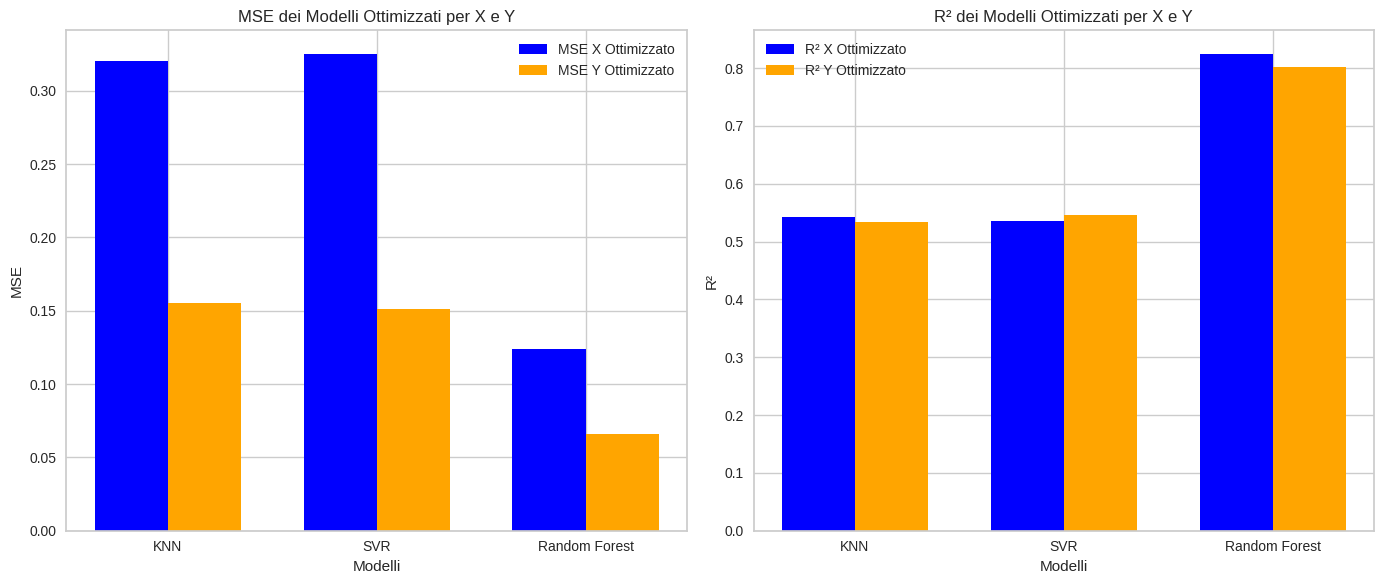

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Modelli per i quali abbiamo valutazioni
models = ['KNN', 'SVR', 'Random Forest']

# Dati per MSE e R² ottimizzati
mse_x_optimized = [0.320, 0.325, 0.124]  # MSE per la coordinata X ottimizzata
mse_y_optimized = [0.155, 0.151, 0.066]  # MSE per la coordinata Y ottimizzata

r2_x_optimized = [0.542, 0.536, 0.824]  # R² per la coordinata X ottimizzata
r2_y_optimized = [0.534, 0.546, 0.801]  # R² per la coordinata Y ottimizzata

# Impostazione della figura
plt.figure(figsize=(14, 6))

# Sottogruppo 1: MSE ottimizzato
plt.subplot(1, 2, 1)
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, mse_x_optimized, width=bar_width, label='MSE X Ottimizzato', color='blue')
plt.bar(x + bar_width/2, mse_y_optimized, width=bar_width, label='MSE Y Ottimizzato', color='orange')

plt.xlabel('Modelli')
plt.ylabel('MSE')
plt.title('MSE dei Modelli Ottimizzati per X e Y')
plt.xticks(x, models)
plt.legend()

# Sottogruppo 2: R² ottimizzato
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, r2_x_optimized, width=bar_width, label='R² X Ottimizzato', color='blue')
plt.bar(x + bar_width/2, r2_y_optimized, width=bar_width, label='R² Y Ottimizzato', color='orange')

plt.xlabel('Modelli')
plt.ylabel('R²')
plt.title('R² dei Modelli Ottimizzati per X e Y')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()